## **Observations and Insights**

In [46]:
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [47]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


### Answer

In [48]:
# Checking the number of mice in the DataFrame.
count_of_mice = combined_df['Mouse ID'].value_counts()
count_of_mice.count()

249

----------------------------------------------------------------------------

In [49]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Copy original df into new 
dup_mice_df = combined_df.copy()

In [50]:
# Select only columns used
duplicate_mice = dup_mice_df[['Mouse ID', 'Timepoint']].drop_duplicates()
# drop duplicates
duplicate_mice

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [51]:
# Optional: Get all the data for the duplicate mouse ID. 
# ALL ROWS
dup_mice_all_rows = combined_df.copy()
# Filter out the duplicate data that was dropped
dup_mice_all_rows2 = dup_mice_all_rows[dup_mice_all_rows[['Mouse ID', 'Timepoint']].duplicated()]
dup_mice_all_rows2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_identified = dup_mice_df[ dup_mice_df['Mouse ID'] == 'g989' ].index
dup_mice_df.drop(duplicate_mouse_identified , inplace=True)
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [53]:
# Checking the number of mice in the clean DataFrame.
# COMPLETELY removed the duplicate. Did NOT leave one original.
count_of_mice2 = dup_mice_df['Mouse ID'].value_counts()
count_of_mice2.count()

248

In [54]:
# Checking the number of mice in the DataFrame.
# Duplicate not removed
count_of_mice = combined_df['Mouse ID'].value_counts()
count_of_mice.count()

249

## **Summary Statistics**

Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_df = dup_mice_df.copy()
summary_tumor_vol_regimen = summary_stats_df[["Drug Regimen", "Tumor Volume (mm3)"]]
grouped_summary = summary_tumor_vol_regimen.groupby("Drug Regimen")

# Create series for each request before inputting into a DF
grouped_tumor_vol_mean = grouped_summary.mean()
grouped_tumor_vol_med = grouped_summary.median()
grouped_tumor_vol_var = grouped_summary.var()
grouped_tumor_vol_std = grouped_summary.std()
grouped_tumor_vol_sem = grouped_summary.sem()
# This method is the most straightforward, creating multiple series and putting them all together at the end.
# Create a DF with all data requested
combined_group_vol_reg = pd.DataFrame({"Mean": grouped_tumor_vol_mean["Tumor Volume (mm3)"],
                                      "Median": grouped_tumor_vol_med["Tumor Volume (mm3)"],
                                      "Variance": grouped_tumor_vol_var["Tumor Volume (mm3)"],
                                      "Std Div": grouped_tumor_vol_std["Tumor Volume (mm3)"],
                                      "SEM": grouped_tumor_vol_sem["Tumor Volume (mm3)"]
                                      })
combined_group_vol_reg.head()

,Mean,Median,Variance,Std Div,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

This method produces everything in a single groupby function.

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
summary_tumor_vol_regimen.groupby('Drug Regimen').agg(
    Mean=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='mean'),
    Median=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='median'),
    Variance=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='var'),
    Std_Div=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='std'),
    SEM=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='sem')
)

,Mean,Median,Variance,Std_Div,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## **Bar Plots**

Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using **pandas**.

In [57]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
# dup_mice_df is the dataframe holding no duplicate mice values.
bar_data_df = dup_mice_df.copy()

# New DF with only columns used
bar_data_df2 = bar_data_df[["Mouse ID","Drug Regimen","Timepoint"]]

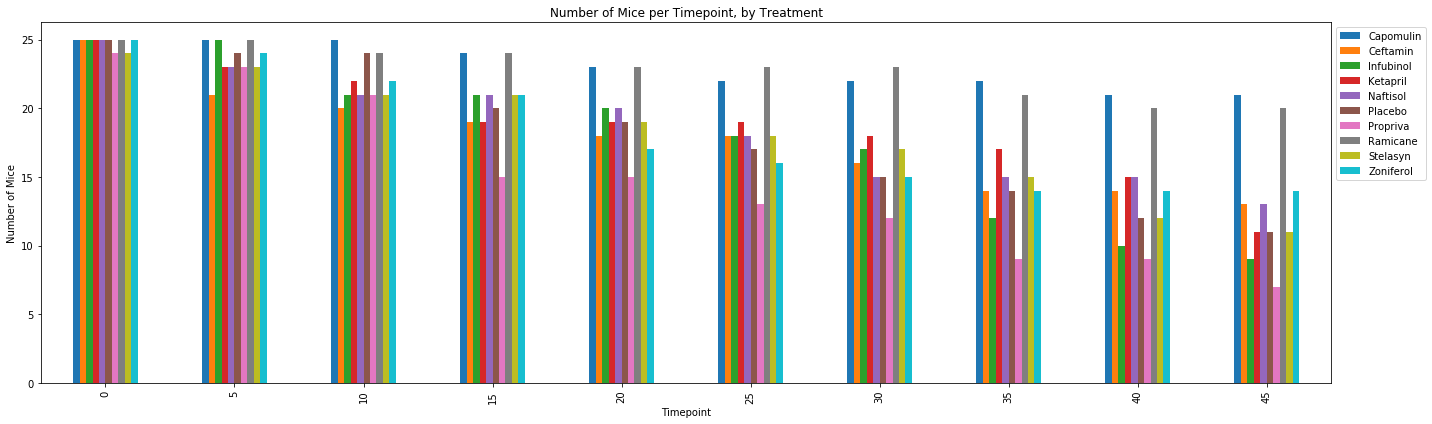

In [58]:
# First attempt 
# Group by 'Timepoint' and 'Drug Regimen' to 'Mouse ID'. Count how many in 'Mouse ID', then how many in each 'Timepoint'.
# Plot as a Bar Chart, stacked, set figure size for visability, add a title.
group_bar_data_df2 = bar_data_df2.groupby(['Timepoint', 'Drug Regimen'])['Mouse ID'].count().unstack(1).plot(kind='bar', figsize=(20, 6), title='Number of Mice per Timepoint, by Treatment')
# Add custom Y Label
group_bar_data_df2.set_ylabel("Number of Mice")
# Move legend outside of chart; was overlapping information with 'best'
group_bar_data_df2.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

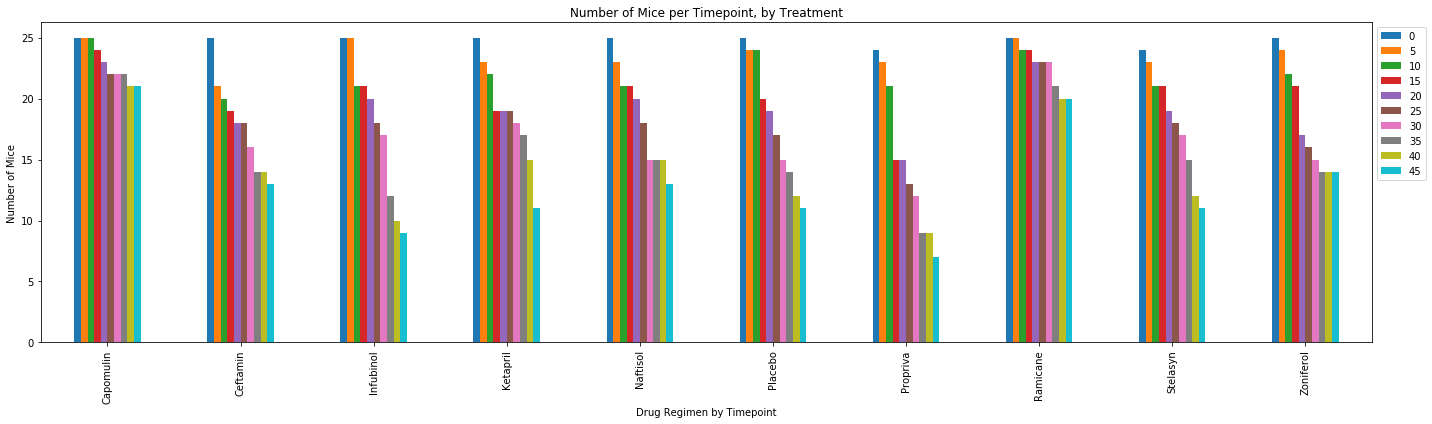

In [59]:
# Second attempt
# Group by 'Timepoint' and 'Drug Regimen' to 'Mouse ID'. Count how many in 'Mouse ID', then how many in each 'Timepoint'.
# Plot as a Bar Chart, stacked, set figure size for visability, add a title.
group_bar_data_df2 = bar_data_df2.groupby(['Drug Regimen','Timepoint'])['Mouse ID'].count().unstack(1).plot(kind='bar', figsize=(20, 6), title='Number of Mice per Timepoint, by Treatment')
# Add custom Y Label
group_bar_data_df2.set_ylabel("Number of Mice")
group_bar_data_df2.set_xlabel("Drug Regimen by Timepoint")
# Move legend outside of chart; was overlapping information with 'best'
group_bar_data_df2.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

 ## Part 2: Graph with Pyplot

Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using **pyplot**.

In [60]:
# Set index to Drug. Sorting for .loc searching. 
bar_data_df2_index = bar_data_df2.set_index('Timepoint')
bar_data_df2_index

,Mouse ID,Drug Regimen
Timepoint,,
0,k403,Ramicane
5,k403,Ramicane
10,k403,Ramicane
15,k403,Ramicane
20,k403,Ramicane
...,...,...
25,z969,Naftisol
30,z969,Naftisol
35,z969,Naftisol


In [61]:
# Find X-Axis label range
tp_list = [0,5,10,15,20,25,30,35,40,45]
x_axis = bar_data_df2['Drug Regimen'].unique()
x_axis

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [62]:
# Look through Timepoint list to count the amount of mice in each drug regimen to timepoint.
count_loop=[]
for i in tp_list:
    location = bar_data_df2_index.loc[i, 'Drug Regimen']
    i = location.value_counts()
    count_loop.append(i)
    #print(i)
# List verication of the count_loop.
#count_loop

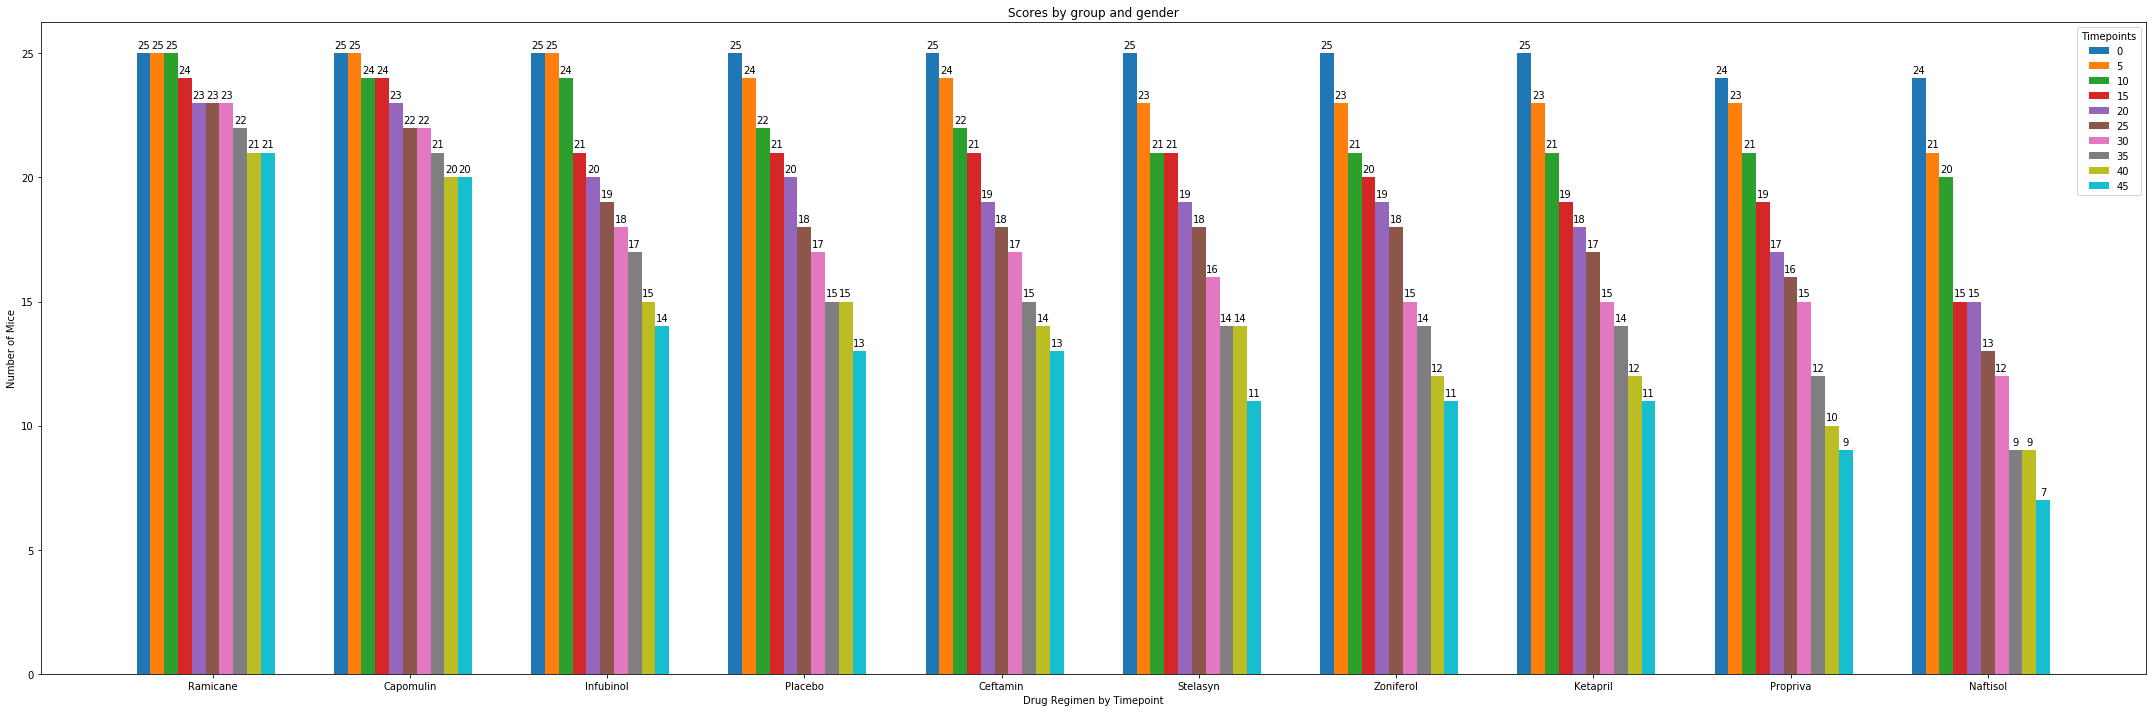

In [63]:
# Generate Plot
# Assign x_labels
labels = bar_data_df2['Drug Regimen'].unique()

# Assign x_label locations
x = np.arange(len(labels))
# Bar Width
width = 0.07

# Size the bar plot, Retreive y_value
fig, ax = plt.subplots(figsize=(30.0,10.0))
rects1 = ax.bar(x - width*5, count_loop[0], width, label='Ramicane')
rects2 = ax.bar(x - width*4, count_loop[1], width, label='Capomulin')
rects3 = ax.bar(x - width*3, count_loop[2], width, label='Infubinol')
rects4 = ax.bar(x - width*2, count_loop[3], width, label='Placebo')
rects5 = ax.bar(x - width*1, count_loop[4], width, label='Ceftamin')
rects6 = ax.bar(x + width*0, count_loop[5], width, label='Stelasyn')
rects7 = ax.bar(x + width*1, count_loop[6], width, label='Zoniferol')
rects8 = ax.bar(x + width*2, count_loop[7], width, label='Ketapril')
rects9 = ax.bar(x + width*3, count_loop[8], width, label='Propriva')
rects10 = ax.bar(x + width*4, count_loop[9], width, label='Naftisol')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Mice')
ax.set_xlabel('Drug Regimen by Timepoint')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(tp_list, title='Timepoints')

# Loop through reacts above in order to show value of y_label above the graphed bar plot bar. 
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Assign y_value value on top of bar
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
autolabel(rects8)
autolabel(rects9)
autolabel(rects10)

fig.tight_layout()
plt.show()

In [311]:
sum(count_loop[0])

248

In [312]:
sum(count_loop[1])

236

In [313]:
sum(count_loop[2])

221

In [314]:
sum(count_loop[3])

205

## **Pie Plots**

In [64]:
pie_plot_data = dup_mice_df.copy()

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender_df = pie_plot_data['Sex'].value_counts()

In [66]:
# List of gender 
mice_labels = ['Male', 'Female']

### Generate a pie plot showing the distribution of female versus male mice using pandas

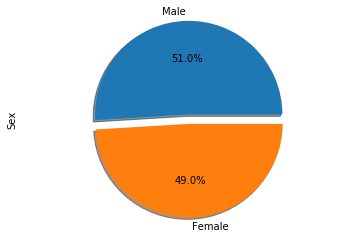

In [67]:
# PLOT: PIE
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_df_pie_pandas = pie_plot_data['Sex'].value_counts().plot(kind='pie', x=mice_gender_df, explode=(0.1,0), labels=mice_labels, autopct="%1.1f%%", shadow=True)
mice_gender_df_pie_pandas
plt.axis('equal')
plt.show()

### Generate a pie plot showing the distribution of female versus male mice using pyplot

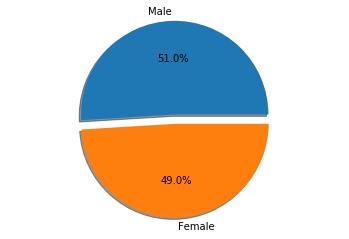

In [68]:
# PLOT: PIE
plt.pie(
    mice_gender_df,
    explode=(0.1,0),
    labels=mice_labels,
    autopct="%1.1f%%",
    shadow=True
)
plt.axis('equal')
plt.show()

## **Quartiles, Outliers and Boxplots**

In [69]:
quartiles_outliers_df = dup_mice_df.copy()

### Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [264]:
# Remove duplicate Timepoints. Only keep final timepoint found.
final_tumor_volume_df = quartiles_outliers_df.drop_duplicates(subset=['Mouse ID'], keep="last", inplace=False)

In [265]:
# Filter DF to only columns used
filtered_final_tumor_volume_df = final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

In [277]:
# Set new index to Drug Regimen
new_index_tumor_volume_df = filtered_final_tumor_volume_df.set_index(['Drug Regimen']).sort_values(by=['Drug Regimen','Tumor Volume (mm3)'], ascending=True)
new_index_tumor_volume_df

,Mouse ID,Tumor Volume (mm3)
Drug Regimen,,
Capomulin,s185,23.343598
Capomulin,m601,28.430964
Capomulin,x401,28.484033
Capomulin,f966,30.485985
Capomulin,u364,31.023923
...,...,...
Zoniferol,g296,68.163195
Zoniferol,w575,68.401286
Zoniferol,q511,68.611061


In [267]:
# Make a list of Drug Regimens for Tumors. Used in for loops to grab specific data by regimen name & used for new df header.
tumor_regimen_list = new_index_tumor_volume_df.index.unique().tolist()
#tumor_regimen_list

In [268]:
# Look through Timepoint list and count the amount of mice in each drug regimen.
# Create an empty list to fill with for loop
tumor_quartile=[]

# Search through new_index_tumor_volume_df with '.loc[regimen name, 'Tumor Volume (mm3)' column]' and get the quartile
for i in tumor_regimen_list:
    location = new_index_tumor_volume_df.loc[i, 'Tumor Volume (mm3)'].quantile(q=[.25, .5, .75])
    # append results to tumor_quartile list before moving to next value in tumor_regimen_list
    tumor_quartile.append(location)

In [269]:
iqr_all = []

# loop through tumor_quartile range (0-10). Find IQR by selecting one value at a time in the tumor_quartile list. 
for i in range(len(tumor_quartile)):
    iqr = (tumor_quartile[i][0.75])-(tumor_quartile[i][0.25])
    # Append finding to iqr_all list before moving to next value
    iqr_all.append(iqr)
#print(iqr_all)

In [285]:
round_iqr_all = [round(num, 2) for num in iqr_all]

In [286]:
# Combine both for loop generated list into one.
tumor_iqr_all_dict = [dict(zip(tumor_regimen_list, round_iqr_all))]
#tumor_iqr_all_dict

## Answer: IQR for all Drug Regimens.
Top 4 'Most Promising': 'Ramicane', 'Capomulin', 'Infubinol', 'Placebo'

In [287]:
# Create DF: IQR for each regimen
tumor_iqr_all_df = pd.DataFrame.from_dict(tumor_iqr_all_dict, orient='columns')
tumor_iqr_all_df

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,7.78,15.58,11.48,13.15,17.48,15.19,13.57,9.1,16.63,16.81


### Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [290]:
# Values for plotting
box_plot_values = round_iqr_all
# Sort to determine outliers
values_sorted = sorted(box_plot_values)
print(values_sorted)

[7.78, 9.1, 11.48, 13.15, 13.57, 15.19, 15.58, 16.63, 16.81, 17.48]


In [356]:
# DF to use columns needed only. 'Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)'
promising_treatment_regimens_4 = final_tumor_volume_df[['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)']]

In [357]:
# Top 4 most promising. Most alive mice to lowest tumor size from 0 - 45 in timepoint
# 'Ramicane', 'Capomulin', 'Infubinol', 'Placebo'

In [387]:
# Single out top 4 drug regimen by name into own df for plotting
promising_treatment_regimens_Capomulin = promising_treatment_regimens_4[promising_treatment_regimens_4['Drug Regimen'] == 'Capomulin']
promising_treatment_regimens_Ramicane = promising_treatment_regimens_4[promising_treatment_regimens_4['Drug Regimen'] == 'Ramicane']
promising_treatment_regimens_Infubinol = promising_treatment_regimens_4[promising_treatment_regimens_4['Drug Regimen'] == 'Infubinol']
promising_treatment_regimens_Placebo = promising_treatment_regimens_4[promising_treatment_regimens_4['Drug Regimen'] == 'Placebo']

In [410]:
# Retreive values from Tumor Volume in new df, by regimen
Capomulin_plot_values = promising_treatment_regimens_Capomulin['Tumor Volume (mm3)']
Ramicane_plot_values = promising_treatment_regimens_Ramicane['Tumor Volume (mm3)']
Infubinol_plot_values = promising_treatment_regimens_Infubinol['Tumor Volume (mm3)']
Placebo_plot_values = promising_treatment_regimens_Placebo['Tumor Volume (mm3)']

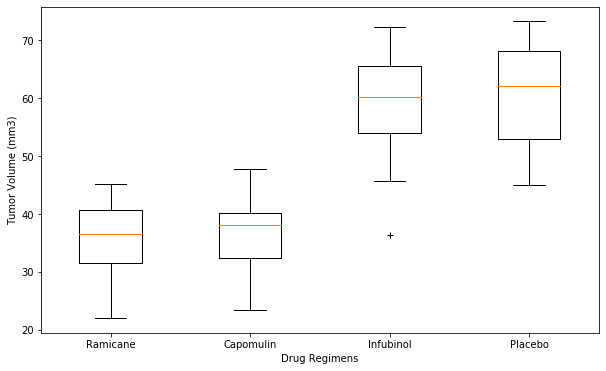

In [386]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
regimen_plot_info = [Ramicane_plot_values, Capomulin_plot_values, Infubinol_plot_values, Placebo_plot_values]
plot_labels = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo']
fig, ax = plt.subplots(figsize=(10, 6))
pos = np.array(range(len(regimen_plot_info))) + 1
bp = ax.boxplot(regimen_plot_info, sym='k+')


ax.set_xticklabels(plot_labels)
ax.set_xlabel('Drug Regimens')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

## **Line and Scatter Plots**

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## **Correlation and Regression**

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
